# Spatial pattern of biases at climatological mean level

- In Figure 1, we explored the bias structure of sWBGT and ESI within an idealized setting. Now, we will explore the bias distribution within the more realistic setting of ERA5 reanalysis data. It would be useful to identify locations where sWBGT/ESI is exceptionally biased and their applications would cause serious under- or over-estimation of heat stress and downstream impacts. 

- First, we explore the spatial pattern of biases at climatological mean level (1990-2019). Since we focus on heat stress, only the hottest calendar month (defined by climatological monthly mean of WBGT) is included.

- In this notebook, we will reproduce Figure 2 in "Explicit Calculations of Wet Bulb Globe Temperature compared with approximations and why it matters for labor productivity" by Qinqin Kong and Matthew Huber. 

In [20]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cmaps
import regionmask
import cartopy.crs as ccrs

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

### Read in data:
- We read in the following file:
  - ```climatological_mean.nc``` which contains the climatological mean values of:
      - daily mean WBGT: ```wbgt_ma```
      - daily maximum WBGT: ```wbgt_dmax```
      - daily minimum WBGT: ```wbgt_dmin```
      - daily mean sWBGT: ```swbgt_ma```
      - daily maximum sWBGT: ```swbgt_dmax```
      - daily minimum sWBGT: ```swbgt_dmin```
      - daily mean ESI: ```esi_ma```
      - daily maximum ESI: ```esi_dmax```
      - daily minimum ESI: ```esi_dmin```


- It was derived from hourly ERA5 reanalysis data covering a 30-year period of 1990-2019. Only the hottest calendar month (determined by climatological monthly mean of WBGT) is included.

- We will use it to quantify biases of sWBGT and ESI at climatological mean level.

In [28]:
# read in data
clima=xr.open_dataset('/scratch/brown/kong97/paper_data/geohealth_2021/climatological_mean.nc')
clima

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
  * latitude    (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    wbgt_ma     (latitude, longitude) float64 ...
    wbgt_dmax   (latitude, longitude) float64 ...
    wbgt_dmin   (latitude, longitude) float64 ...
    esi_ma      (latitude, longitude) float64 ...
    esi_dmax    (latitude, longitude) float64 ...
    esi_dmin    (latitude, longitude) float64 ...
    swbgt_ma    (latitude, longitude) float32 ...
    swbgt_dmax  (latitude, longitude) float32 ...
    swbgt_dmin  (latitude, longitude) float32 ...

### create land mask

We use ```regionmask``` python package to create a land mask which enables us to plot data only over land.

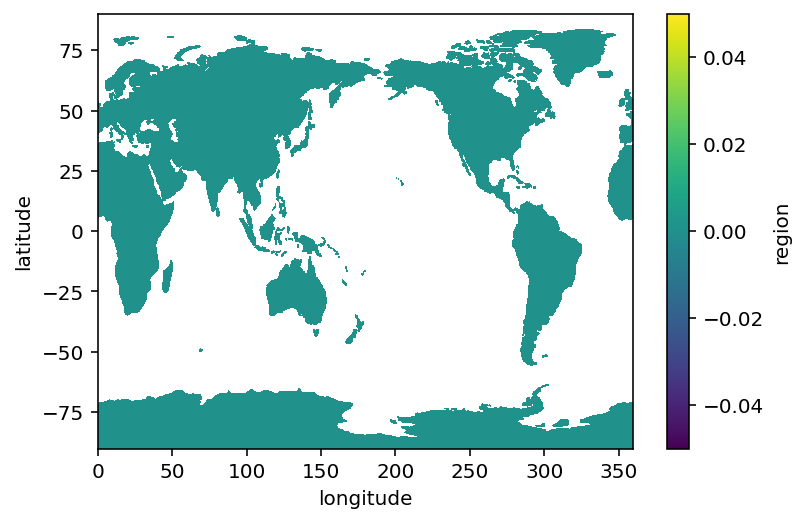

In [29]:
mask = regionmask.defined_regions.natural_earth.land_110.mask(clima,lon_name="longitude",lat_name="latitude")
mask.plot()

# Reproduce Figure 2

In [46]:
# create meshgrid of latitude and longitude
LON,LAT=np.meshgrid(clima.longitude,clima.latitude)

# function to plot each individual subplot
def subplot(data,axis,norm,cmap,landmask):
    g=axis.pcolormesh(LON, LAT,data.where(landmask==0),
                      transform=ccrs.PlateCarree(),
                      cmap=cmap,norm=norm,rasterized=True) # make the plot
    axis.coastlines(linewidth=0.5) # add coastlines
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,70]) # set extent of the map to exclude high latitudes
    return g

# function to make the whole plot
def plot(clima):    
    # set the colorbar scale
    levels1 = np.arange(-10,37,2) 
    norm1=mpl.colors.BoundaryNorm(levels1,ncolors=len(levels1)+1,extend='both')
    # choose colormap
    cmap1=cmaps.StepSeq25.reversed()
    
    # set the colorbar scale
    levels2 = [-7, -6, -5, -4, -3, -2, -1,-0.5,  0.5,  1,  2,  3,  4,  5,  6,  7]
    norm2=mpl.colors.BoundaryNorm(levels2,ncolors=len(levels2)+1,extend='both')
    # we pick colors from different colormaps, create a new color list, and then create a customized colormap from this new color list
    color1=cmaps.hotcolr_19lev.colors
    color2=cmaps.StepSeq25.colors[::-1]
    color3= cmaps.amwg_blueyellowred.colors
    color_new=np.concatenate((color1[0:8],np.atleast_2d(color1[9]),np.concatenate((color2[10:13],color3[9:14]))))
    cmap2=mpl.colors.ListedColormap(color_new)
    
    # use gridspec to customize the relative size and position of subplots
    gs_top = plt.GridSpec(3, 3, top=0.95,hspace=-0.4,wspace=0.05)
    gs_base = plt.GridSpec(3, 3,hspace=-0.4,wspace=0.05)
    # create a figure
    fig = plt.figure(figsize=[18, 12])
    # add axis
    ax1 = fig.add_subplot(gs_top[0,0],projection=ccrs.Mollweide(central_longitude=10))
    ax2 = fig.add_subplot(gs_top[0,1],projection=ccrs.Mollweide(central_longitude=10))
    ax3 = fig.add_subplot(gs_top[0,2],projection=ccrs.Mollweide(central_longitude=10))
    ax4 = fig.add_subplot(gs_base[1,0], projection=ccrs.Mollweide(central_longitude=10))
    ax5 = fig.add_subplot(gs_base[1,1], projection=ccrs.Mollweide(central_longitude=10))
    ax6 = fig.add_subplot(gs_base[1,2], projection=ccrs.Mollweide(central_longitude=10))
    ax7 = fig.add_subplot(gs_base[2,0], projection=ccrs.Mollweide(central_longitude=10))
    ax8 = fig.add_subplot(gs_base[2,1], projection=ccrs.Mollweide(central_longitude=10))
    ax9 = fig.add_subplot(gs_base[2,2], projection=ccrs.Mollweide(central_longitude=10))
    
    # add annotates for each axis
    anno_opts = dict(xy=(0, 1.05), xycoords='axes fraction',va='center', ha='center')
    num=['a','b','c','d','e','f','g','h','i']
    i=0
    for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
        ax.annotate(num[i], **anno_opts,fontsize=16)
        i+=1
    
    # call subplot function to plot climatological mean values of daily mean, maximum and minimum WBGT
    g=subplot(clima.wbgt_ma-273.15,ax1,norm1,cmap1,mask)
    subplot(clima.wbgt_dmax-273.15,ax2,norm1,cmap1,mask)
    subplot(clima.wbgt_dmin-273.15,ax3,norm1,cmap1,mask)
    
    # plot colorbar for ax1-ax3
    cb1=fig.colorbar(g,ax=(ax1,ax2,ax3),orientation='horizontal',
                     pad=0.05,shrink=0.5,fraction=.08,ticks=[-10,-2,8,18,28,36],aspect=30)
    cb1.set_label(label="WBGT ($^\circ$C)", size=14)
    cb1.ax.tick_params(labelsize=12)
    
    # call subplot function to plot biases at climatological mean level
    # swbgt biases
    h=subplot(clima.swbgt_ma-clima.wbgt_ma,ax4,norm2,cmap2,mask)
    subplot(clima.swbgt_dmax-clima.wbgt_dmax,ax5,norm2,cmap2,mask)
    subplot(clima.swbgt_dmin-clima.wbgt_dmin,ax6,norm2,cmap2,mask)
    # esi biases
    subplot(clima.esi_ma-clima.wbgt_ma+273.15,ax7,norm2,cmap2,mask)
    subplot(clima.esi_dmax-clima.wbgt_dmax+273.15,ax8,norm2,cmap2,mask)
    subplot(clima.esi_dmin-clima.wbgt_dmin+273.15,ax9,norm2,cmap2,mask)
    
    # plot colorbar for ax4-ax9
    cb2=fig.colorbar(h,ax=((ax4,ax5,ax6),(ax7,ax8,ax9)),orientation='horizontal', pad=0.05,shrink=0.5,fraction=.09,ticks=np.arange(-7,8),aspect=30,spacing='proportional') 
    cb2.set_label(label="sWBGT/ESI - WBGT ($^\circ$C)", size=14)
    cb2.ax.tick_params(labelsize=12)    

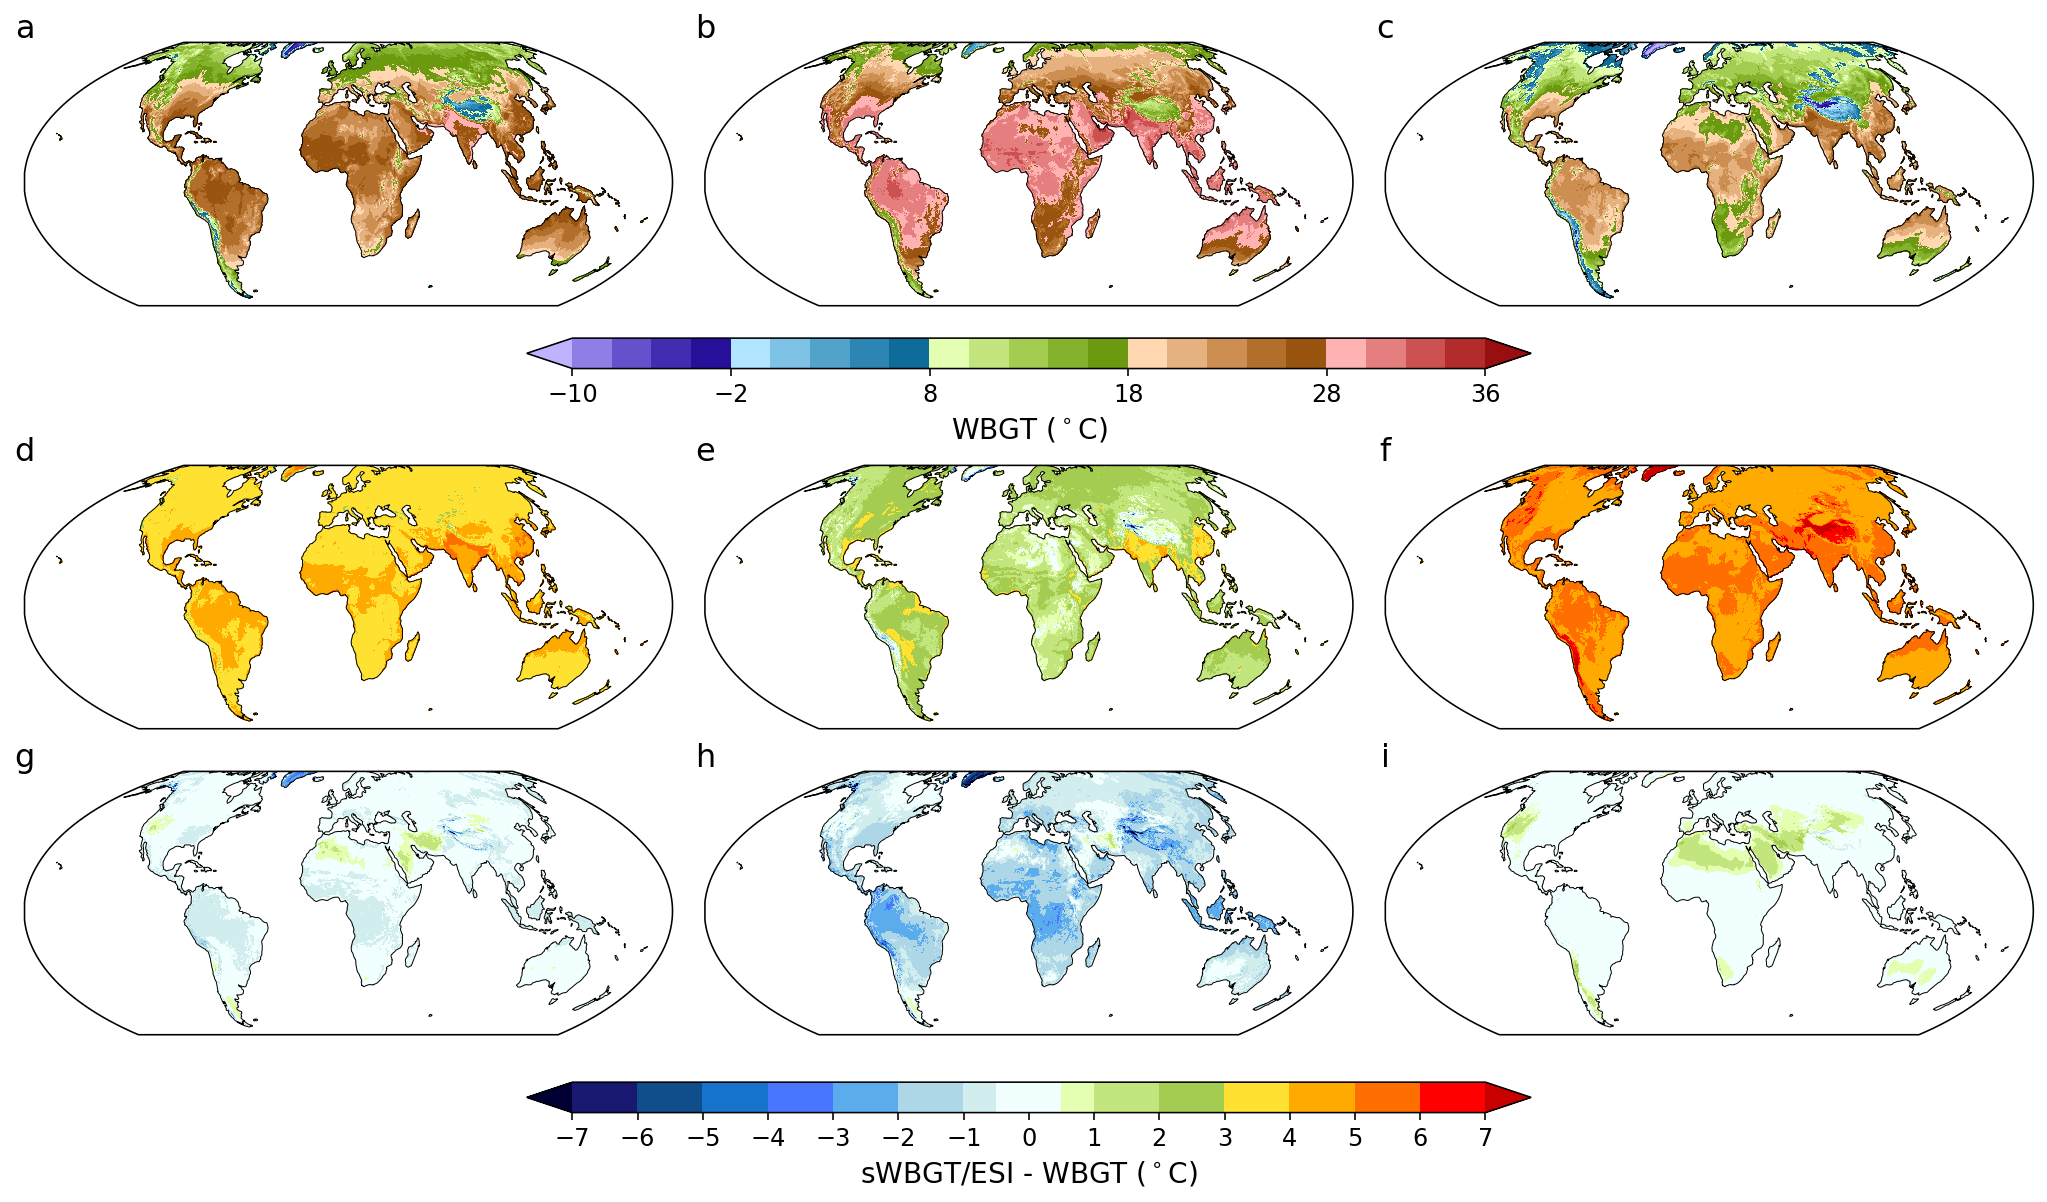

In [47]:
plot(clima)

### Figure caption
Climatological monthly average (CMA) of daily mean (a), maximum (b) and minimum (c) WBGT for the period 1990-2019. Biases of sWBGT (d-f) and ESI (g-i) with respect to CMA of daily mean (d, g), maximum (e, h) and minimum values (f, i). Only the hottest month (determined by CMA WBGT) being included.

# Findings:
- sWBGT consistently overestimates WBGT with larger biases for daily minimum and smaller biases for daily maximum. Hot-humid areas such as the tropics, south Asia, eastern China and southeastern U.S., exhibit larger positive biases. Subtropical dry regions show smaller biases in comparison.

- ESI has smaller biases. Negative biases dominate daily maximum values particularly in the tropics potentially due to relatively strong solar radiation and low wind speed. Subtropical dry regions, despite even stronger solar radiation, show smaller negative and even positive biases for daily maximum as a result of low humidity and probably relatively higher wind speed. Biases of daily minimum ESI are generally small except over-estimations by 1-2°C over North Africa and Middle East (MENA) dry regions.

- ESI is a better approximation particularly for nighttime and daily mean situation. However, the larger negative biases for daily maximum imply that ESI may substantially underestimate daily peak heat stress.